## 2. Doğrusal Olmayan Regresyon

Doğrusal olmayan regresyon, bağımlı değişken ile bir dizi bağımsız değişken arasındaki ilişkinin doğrusal olmayan bir modelini bulmakta kullanılan bir yöntemdir. Doğrusal modellerin tahmin edilmesiyle kısıtlanan geleneksel doğrusal regresyondan farklı olarak, doğrusal olmayan regresyon, modellerin bağımsız ve bağımlı değişkenler arasında keyfi ilişkiler ile tahmin edilebilmesini sağlar.

##### Bu başlık altında;
#####  •  K En Yakın Komşu (KNN)
#####  •  Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)
#####  •  Karar Ağaçları / Classification and Regression Trees (CART)
#####  •  Destek Vektör Regresyonu (SVR)
#####  •  Bagged Trees Regresyon (Bootstrap Aggregation)
#####  •  Random Forests
#####  •  Gradient Boosting Machines (GBM)
#####  •  XGBoost (Extreme Gradient Boosting)
#####  •  Light GBM
#####  •  CatBoost
##### yöntemlerini ele alarak veri setimiz üzerinde inceleyeceğiz. 

## 2.1. K En Yakın Komşu (KNN)

KNN en basit anlamı ile içerisinde tahmin edilecek değerin bağımsız değişkenlerinin oluşturduğu vektörün en yakın komşularının hangi sınıfta yoğun olduğu bilgisi üzerinden sınıfını tahmin etmeye dayanır.

##### İşlem Adımları:
    1. Komşu sayısını belirle (k)
    2. Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla.
    3. Uzaklıkları sırala ve belirlenen k değerine göre en yakın k sayıda gözlemi seç.
    4. Sınıflandırma yapılıyorsa en sık karşılaşılan sınıf, regresyon yapılıyor ise ortalama değeri tahmin değeri olarak    belirle.

### 2.1.1. Model

In [8]:
# Kullanılacak kütüphanelerin kurulması
!pip install skompiler
!pip install xgboost
!pip install catboost
!pip install lightgbm


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Kullanılacak kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from skompiler import skompile
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from datetime import datetime
from warnings import filterwarnings

In [5]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()
# Yazmazsak hata veriyor!
youtube.index = youtube.iloc[:,0]# video_id'lerini index olarak belirttik.
youtube=youtube.iloc[:,7:11]# Sayısal alanlardan 'views', 'likes', 'dislikes', 'comment_count' ile çalışacağımız için
                            # sadece o alanları seçtik.
    
youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.   

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])# Belirtilen alanların dummy değişkenlere dönüştürülmesi
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)
# Modeli oluşturup fit edelim.
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor()

In [6]:
knn_model.n_neighbors # default değeri 5

5

In [7]:
knn_model.effective_metric_ # Modelide kullanılan etkin metriği döndürür.

'euclidean'

### 2.1.2. Tahmin

In [8]:
y_pred = knn_model.predict(X_test)
print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))
RMSE = []
# Cross Validation(çapraz doğrulama) yapmadan hatalara bir bakalım.
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print("k =" , k , "için RMSE değeri: ", rmse)

test hatası: 10198603.34222489
k = 1 için RMSE değeri:  2968321.837374847
k = 2 için RMSE değeri:  10173512.76280935
k = 3 için RMSE değeri:  13732537.531081066
k = 4 için RMSE değeri:  16318938.496977925
k = 5 için RMSE değeri:  16623486.767434701
k = 6 için RMSE değeri:  16731758.446209403
k = 7 için RMSE değeri:  17103271.709758602
k = 8 için RMSE değeri:  17344586.580348026
k = 9 için RMSE değeri:  17556535.522548974
k = 10 için RMSE değeri:  17876684.66224692


### 2.1.3. Model Tuning

In [9]:
# GridSearchCV ile optimum k sayısının belirlenmesi
# GridSearchCV => birçok farklı hiperparametre değeri kombinasyonunu otomatik olarak değerlendirir ve her bir kombinasyon için+ 
#çapraz doğrulama (cross-validation) kullanarak modelin performansını değerlendirir. Ardından en iyi performansı sağlayan+ 
#hiperparametre belirlenebilir.

knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [10]:
# Modelin en iyi sonuçları elde etmek için kaç tane en yakın komşunun kullanılması gerektiğini bulalım.
knn_cv_model.best_params_["n_neighbors"]

24

In [11]:
RMSE = []
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10,
    scoring = "neg_mean_squared_error").mean())
    # Cross Validation olmadan hatalar
    RMSE.append(rmse)
    # Cross Validation kullanılarak alınan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  2968321.837374847 RMSE_CV değeri:  20431924.884159032
k = 2 için RMSE değeri:  10173512.76280935 RMSE_CV değeri:  20588206.96059764
k = 3 için RMSE değeri:  13732537.531081066 RMSE_CV değeri:  21784599.87864279
k = 4 için RMSE değeri:  16318938.496977925 RMSE_CV değeri:  20824831.105890557
k = 5 için RMSE değeri:  16623486.767434701 RMSE_CV değeri:  20799677.065547597
k = 6 için RMSE değeri:  16731758.446209403 RMSE_CV değeri:  20460602.229824014
k = 7 için RMSE değeri:  17103271.709758602 RMSE_CV değeri:  20331094.617616553
k = 8 için RMSE değeri:  17344586.580348026 RMSE_CV değeri:  20347337.206068233
k = 9 için RMSE değeri:  17556535.522548974 RMSE_CV değeri:  20406497.105573125
k = 10 için RMSE değeri:  17876684.66224692 RMSE_CV değeri:  20184184.310048908


In [12]:
# k=4 için train değil test setini deneyelim.
knn_tuned = KNeighborsRegressor(n_neighbors=4)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

10167714.509221265

In [13]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=24)

In [14]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

10044294.658506747

## 2.2. Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)

Yapay sinir ağları, insan beyninin bilgi işleme tekniğinden esinlenerek geliştirilmiş bir bilgi işlem teknolojisidir. YSA ile basit biyolojik sinir sisteminin çalışma şekli taklit edilir. Yani biyolojik nöron hücrelerinin ve bu hücrelerin birbirleri ile arasında kurduğu sinaptik bağın dijital olarak modellenmesidir.

### 2.2.1. Model

In [15]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()
# Yazmazsak hata veriyor!
youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [16]:
# Değişken standartlaştırması
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
filterwarnings('ignore')

mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)# Modelin oluşturulması ve fit edilmesi
print(mlp_model)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

MLPRegressor(hidden_layer_sizes=(100, 20))
4
(100, 20)


### 2.2.2 Tahmin

In [18]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

14596867.416089136

### 2.2.3. Model Tuning

In [19]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [20]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
            'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
            'activation': ['relu','logistic']}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [21]:
mlp_cv_model.best_params_ # En iyi performansı sağlayan hiperparametre değerlerini içeren bir sözlüğü döndürür.

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (300, 200, 150)}

In [22]:
mlp_tuned = MLPRegressor(activation=mlp_cv_model.best_params_['activation'],
                        alpha = mlp_cv_model.best_params_['alpha'],
                        hidden_layer_sizes = mlp_cv_model.best_params_['hidden_layer_sizes'])
print(mlp_tuned)
print(mlp_tuned.activation)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(300, 200, 150))
relu


In [23]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(300, 200, 150))

In [24]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

13420137.199426513

## 2.3. Karar Ağaçları / Classification and Regression Trees (CART)

Temel amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

### 2.3.1. Model

In [2]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()
# Yazmazsak hata veriyor!
youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [3]:
# Tek bir bağımsız değişkenle deneyelim.
X_train = pd.DataFrame(X_train["likes"])
X_test = pd.DataFrame(X_test["likes"])

In [4]:
# Modelin oluşturulup ardından eğitilmesi.
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

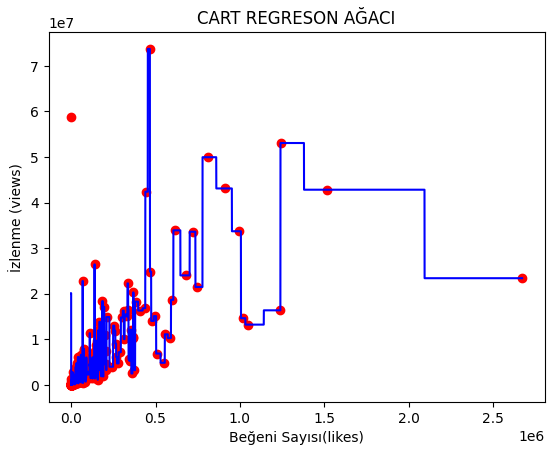

In [5]:
filterwarnings('ignore') # Uyarıları görmezden gelmek için

X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Beğeni Sayısı(likes)') 
plt.ylabel('İzlenme (views)') ;

In [10]:
# skompiler kütüphanesi ile karar ağacının karar modelini python koduna çeviriyoruz.
print(skompile(cart_model.predict).to('python/code'))

(((20130470.666666668 if x[0] <= 16.0 else 348486.67015706806 if x[0] <= 
    25492.0 else 2766367.871287129) if x[0] <= 137879.0 else 
    8710610.351851853) if x[0] <= 378923.0 else ((17139834.666666668 if x[0
    ] <= 439051.0 else (42382073.0 if x[0] <= 453835.5 else 73711644.0) if 
    x[0] <= 466561.5 else 24853980.0) if x[0] <= 473978.0 else 
    11566034.714285715) if x[0] <= 605349.5 else 31030685.692307692)



### 2.3.2. Tahmin

In [11]:
x = [91]

In [12]:
(((20130470.666666668 if x[0] <= 16.0 else 348486.67015706806 if x[0] <= 
    25492.0 else 2766367.871287129) if x[0] <= 137879.0 else 
    8710610.351851853) if x[0] <= 378923.0 else ((17139834.666666668 if x[0
    ] <= 439051.0 else (42382073.0 if x[0] <= 453835.5 else 73711644.0) if 
    x[0] <= 466561.5 else 24853980.0) if x[0] <= 473978.0 else 
    11566034.714285715) if x[0] <= 605349.5 else 31030685.692307692)

348486.67015706806

In [13]:
X_test[0:5]

,likes
video_id,
HBfEf9MsRr4,3626
b4vTZx_AtHk,106739
2m2HLU5uVwg,6829
7FM_MfpYOLU,65979
Un8b0JDw0Bc,20697


In [14]:
cart_model.predict(X_test)[0:5]

array([ 348486.67015707, 2766367.87128713,  348486.67015707,
       2766367.87128713,  348486.67015707])

In [15]:
cart_model.predict([[91]]) # Oluşturulan karar ağacı modeli kullanılarak 91 girdisi ile üzerinde tahmin yapmayı sağlar.

array([348486.67015707])

In [16]:
# Tahmin edilen değerlerle gerçek değerler arasındaki ortalama karesel hatayı hesaplayalım.
y_pred =cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7154835.558925062

### 2.3.3. Model Tuning

In [17]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

8749545.055345291

In [19]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [20]:
cart_cv_model.best_params_ # Çapraz doğrulama işlemi sonucunda en iyi hiperparametre değerlerini döndürür.

{'max_leaf_nodes': 9, 'min_samples_split': 10}

In [21]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 10)

cart_tuned.fit(X_train, y_train)# En iyi hiperparametre değerlerini uygulayarak modeli doğruladık ve fit ettik.

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=10)

In [22]:
y_pred = cart_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred)) # Ortalama karesel hata

5413305.09651908

In [23]:
# Tüm bağımsız değişkenlerle tekrar deneyelim.
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()
# Yazmazsak hata veriyor!
youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

# İlkel test hatasına bakalım.
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

# Cross Validation
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)
print(cart_cv_model.best_params_)
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = cart_cv_model.best_params_['max_leaf_nodes'], 
                                   min_samples_split = cart_cv_model.best_params_['min_samples_split'])
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

9188667.455273082
{'max_leaf_nodes': 9, 'min_samples_split': 4}
9969619.077682057


## 2.3. Destek Vektör Regresyonu (SVR)

Temel amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğrinin belirlenmesidir.

### 2.3.1. Model (Doğrusal SVR)

In [25]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [28]:
# Burada tüm parametreleri de alabiliriz fakat biz örnek olması açısından sadece 'likes' parametresini alacağız.
# Model tuning altında tüm parametreler için de deneyeceğiz.
X_train = pd.DataFrame(X_train["likes"])
X_test = pd.DataFrame(X_test["likes"])
svr_model = LinearSVR().fit(X_train, y_train)

# İlk değer için modelimizi deneyebiliriz.
svr_model.predict(X_train)[0:5]

array([ 291539.05213151,  252208.63645008,   56348.62891427,
       1169918.33568355,   25567.11608581])

In [29]:
# Doğrusal modelimizin parametre katsayıları
print ("y = {0} + {1} x".format(svr_model.intercept_[0],
                                svr_model.coef_[0]))

y = 29.65868154766144 + 27.312788667662904 x


In [40]:
X_train["likes"][0:1] # Aşağıdaki çıktıya göre x değeri 10673 olur.

video_id
TUUUh-51t1k    10673
Name: likes, dtype: int64

In [38]:
youtube.head()

,views,likes,dislikes,comment_count
video_id,,,,
kTlv5_Bs8aw,54083634,2960250,57944,556154
elwTgpHlty0,15100123,498726,13140,24380
WS7f5xpGYn8,29669903,790568,158437,79160
muAPJiMho2Y,3416096,107854,1110,11496
bzzk0R14HD4,74021,382,15,39


In [41]:
# Değerleri formülde yerine yazıp sonucu aldığımızda doğru y değerine ulaştığımızı görüyoruz.
29.65868154766144 + 27.312788667662904*10673 

291539.05213151383

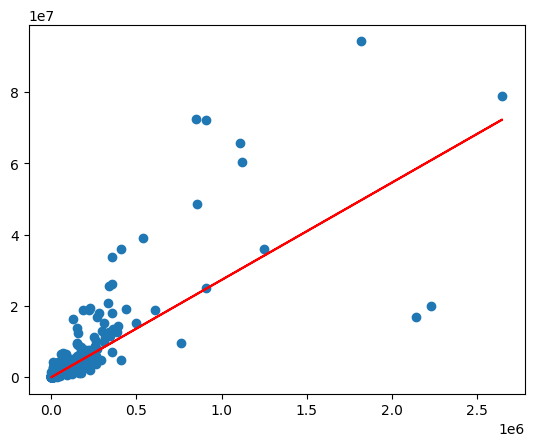

In [42]:
y_pred = svr_model.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [43]:
# Lineer regresyon modeliyle svm modelini karşılaştıralım.
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = 849325.5847883672 + 31.516273094187632 x


In [44]:
# Lineer regresyon ile elde ettiğimiz parametre katsayıları
849325.5847883672 + 31.516273094187632*10673

1185698.7675226317

Text(0, 0.5, 'İzlenme (views)')

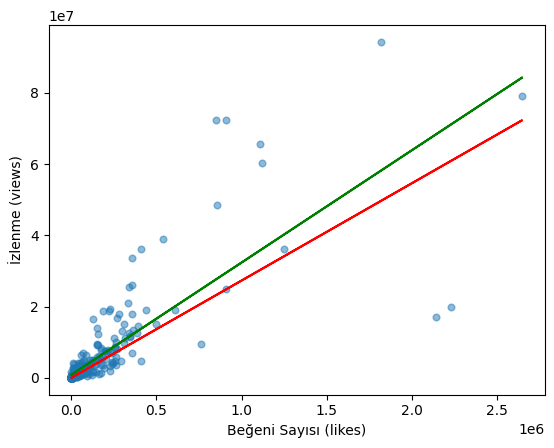

In [45]:
# İki yöntemi de görsel olarak karşılaştıralım.
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')
plt.xlabel("Beğeni Sayısı (likes)")
plt.ylabel("İzlenme (views)")

##### Not: Yukarıdaki grafik gözlemlendiğinde;
Lineer regresyon yöntemiyle elde edilen doğru (yeşil) beğeni sayılarına göre daha fazla izlenme eğilimindedir. Bunun sebebi grafiğin üstünde görülen aykırı değerlerin lineer modelin tahminini yukarı çekmesidir.

SVR'de ise (robust bir yöntem olduğundan) aykırı gözlemlerin etkisi daha düşüktür.

### 2.3.2. Tahmin (Doğrusal SVR)

In [46]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0]))

y = 29.65868154766144 + 27.312788667662904 x


In [47]:
svr_model.predict([[10673]]) 

array([291539.05213151])

In [48]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

9487412.289933344

### 2.3.3. Model Tuning (Doğrusal SVR)

In [49]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

# Yapılan çapraz doğrulama işlemi sonucunda elde edilen en iyi hiperparametre değerlerinden ilkini döndürelim.
pd.Series(svr_cv_model.best_params_)[0]

1.3000000000000003

In [50]:
# En iyi C değeriyle eğitilmiş LineerSVR modelini kullanarak X_test veri kümesinde tahmin yaparak tahminlerin gerçek 
# değerlerle olan ortalama karesel hatasını hesaplayalım.
svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

8782481.18616097

In [51]:
# SVR modelin tüm değişkenler için çalıştırılması.
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

svr_model = LinearSVR().fit(X_train, y_train)
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

print(pd.Series(svr_cv_model.best_params_)[0])

svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

0.30000000000000004


10061638.347871626

In [52]:
svr_model.intercept_ # Modelin kesme noktasına bakalım.

array([48.85240244])

In [53]:
svr_model.coef_ # SVR modelin katsayılarını dizi şeklinde gösterir.

array([ 12.92006125,  97.02925088, -25.47987987])

### 2.3.4. Model (Doğrusal Olmayan SVR)

In [56]:
# Bir veri seti oluşturup lineer regresyon ile SVR'yi görsel olarak karşılaştıralım.
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)
# Aykırı gözlemler
x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

# Lineer regresyon
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

# SVR
eps = 0.1 # Default degeri
# rbf=radial bases function (doğrusal olmayan bir form)
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])


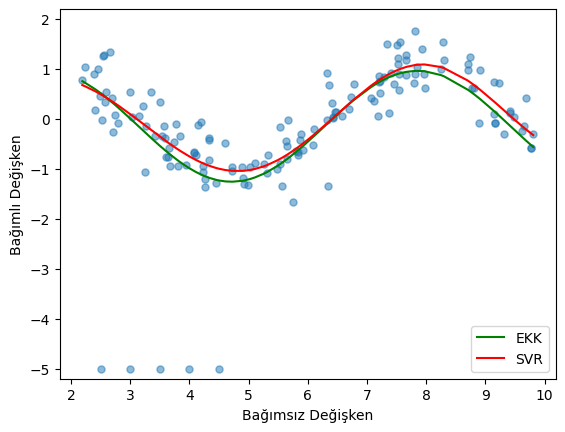

In [57]:
svr_pred = svr.predict(x_sim[:, np.newaxis])
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

#### Not: 
Grafikte sol altta eklenen aykırı değerlere dikkat edersek önceki bölümde olduğu gibi En Küçük Kareler yöntemini kullanan lineer regresyon yönteminin eğrisini aşağı çektiğini gözlemleyebiliyoruz.

In [59]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

svr_rbf = SVR(kernel="rbf").fit(X_train, y_train) # Model oluşturulması ve fit edilmesi

### 2.3.5. Tahmin (Doğrusal Olmayan SVR)

In [61]:
y_pred = svr_rbf.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

17591704.59798848

### 2.3.6. Model Tuning (Doğrusal Olmayan SVR)

In [63]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50, 60, 70,
                               80, 90, 100, 110, 120, 130, 140, 200, 300, 400,
                               500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, ...]})

In [64]:
svr_cv_model.best_params_
# Çıktı sonucuna göre en iyi parametrenin 6000 olduğunu görmekteyiz.

{'C': 6000}

In [65]:
svr_tuned = SVR(kernel="rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,
                                                                                y_train)

y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

17456687.80795424

## 2.4. Bagged Trees Regresyon (Bootstrap Aggregation)

Temeli, Boostrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.

### 2.4.1. Model

In [66]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [69]:
# bootstrap_features default değeri false'dır. Biz bootstrap örneklerini gözlemlemek için true verdik.
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [70]:
# Tahminci sayısı
bag_model.n_estimators

10

In [74]:
# Her bir ağacın örnekleri
bag_model.estimators_samples_

[array([248, 308, 183, 208,  53,  77, 186, 157, 266, 104, 123, 270, 178,
         42,  27, 188, 313,  97, 216, 262, 239,  73,  73, 147, 282, 129,
         24, 178, 360,  96, 260, 256, 164, 141,  19, 217, 144,  66,  82,
        286,  45, 310, 143,  17, 316, 200, 278, 258, 264, 182, 340, 340,
        172, 105, 269, 259, 136, 365, 196, 186, 212, 116, 213, 168,  30,
        341, 136, 121, 262, 217, 165, 273,  29, 121, 362, 128, 335, 280,
        140, 317, 179,   2, 220, 358, 296, 372, 304, 208, 286, 170, 208,
        212,  65,  80, 301, 298, 325, 329, 233, 126, 184, 362, 106,  46,
        320, 349, 222, 150, 165, 261, 141, 166, 253, 340, 248, 208, 173,
        113,  51, 322,  27, 354,   6, 353, 374,  62,  96, 158, 232, 109,
         75, 329, 320, 325, 257, 249, 150, 260, 147, 341, 220, 271, 153,
        123, 359, 235, 306, 288, 168, 262, 340, 315, 312, 299, 370, 267,
         66, 166,  50, 316, 133, 248, 317, 168, 120, 349, 253, 196, 287,
        111, 204, 334, 186, 213,  37, 263, 332, 373

In [75]:
# Her ağacın bağımsız değişkenleri
bag_model.estimators_features_

[array([1, 1, 2]),
 array([2, 1, 2]),
 array([0, 2, 0]),
 array([2, 2, 2]),
 array([0, 2, 0]),
 array([2, 1, 1]),
 array([0, 2, 0]),
 array([2, 0, 0]),
 array([0, 1, 1]),
 array([2, 0, 1])]

### 2.4.2. Tahmin

In [76]:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

13817246.335512161

In [77]:
# Modeldeki 2. tahmin ediciyi kullanarak X_test veri kümesi üzerinde tahmin yapmayı sağlar.
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

np.sqrt(mean_squared_error(y_test, iki_y_pred))# y_testin ve iki_y_pred'in ortalama karesel hatası

12870959.00482069

In [78]:
# Modeldeki 7. tahmin ediciyi kullanarak X_test veri kümesi üzerinde tahmin yapmayı sağlar.
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

np.sqrt(mean_squared_error(y_test, yedi_y_pred))

17113482.474140022

### 2.4.3. Model Tuning

In [79]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [80]:
# Çapraz doğrulama ve modelin fit edilmesi
bag_params = {"n_estimators": range(2,20)}

bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [81]:
bag_cv_model.best_params_ # Çapraz doğrulama sonucunda en iyi parametre

{'n_estimators': 10}

In [82]:
# En iyi parametreyi uygulayarak ve random_state=45 vererek modelin fit edilmesi.
bag_tuned = BaggingRegressor( n_estimators = 10, random_state = 45)

bag_tuned.fit(X_train, y_train)

BaggingRegressor(random_state=45)

In [83]:
y_pred = bag_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

16983596.133857284

## 2.5. Random Forests

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesidir.

- Bagging (Breiman, 1996) ile Random Subspace (Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur.
- Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir.
- Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
- Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin
belirlenmesi için kullanılır.
- Her düğüm noktasında rastgele değişken seçimi yapılır. (regresyon'da p/3, sınıflama'da karekök p)
- Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir.

### 2.5.1. Model

In [43]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [44]:
# Random Forest yöntemi ile modelin oluşturularak eğitilmesi
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 2.5.2. Tahmin

In [45]:
rf_model.predict(X_test)[0:5]

array([  750034.91,  3035362.22,   391842.55, 25150235.31,   180744.88])

In [46]:
y_pred = rf_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

7961805.276063171

### 2.5.3. Model Tuning

In [47]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
# n_jobs = -1 yukarıda yapılacak hesap sayıyı her bir değerin kombinasyonu düşünüldüğünde çok fazla olmaktadır.
# n_jobs parametresi işlemcinin paralel yürütebileceği işlemleri aynı anda yürütmesini sağlamaktadır.

In [48]:
rf_cv_model.fit(X_train, y_train)
rf_cv_model.best_params_ # Modele uygulanan çapraz doğrulama sonucundaki en iyi parametreler

{'max_depth': 6, 'max_features': 3, 'n_estimators': 500}

In [49]:
# En iyi parametrelerin modele uygulanarak fit edilmesi.
rf_tuned = RandomForestRegressor(max_depth  = 6, 
                                 max_features = 3, 
                                 n_estimators =500)

rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=3, n_estimators=500)

In [50]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

7802282.913915791

Text(0.5, 0, 'Değişken Önem Düzeyleri')

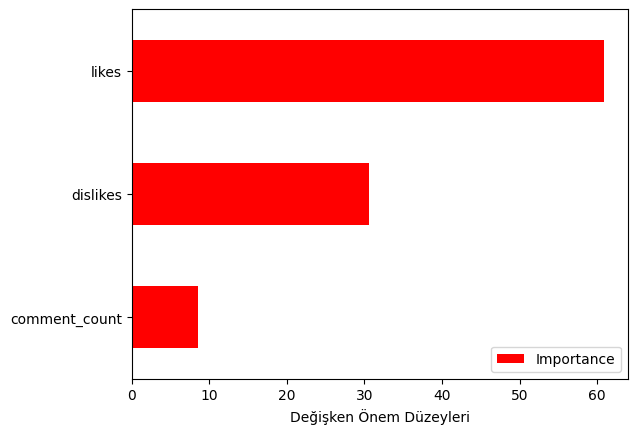

In [51]:
# Değişkenlerin önem düzeyine bakalım.
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## 2.6. Gradient Boosting Machines (GBM)

Adaptive Boosting (AdaBoost) zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması için geliştirilen bir yöntemdir.

AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genellenmiş bir versiyonudur.

• Gradient Boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.

• Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) oluşturulur.

• GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır.

• GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines,...)

• Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir.

• Boosting + Gradient Descent

### 2.6.1. Model

In [25]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [26]:
#GBM ile modelin oluşturulması ve eğitilmesi işlemini yapalım.
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

### 2.6.2. Tahmin

In [28]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4006310.1434801663

### 2.6.3. Model Tuning

In [29]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [30]:
# Algoritmanın çalışma zamanına bakalım.
t1 =  datetime.now()
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0:14:57.014699


GBM algoritmasının veri setimiz üzerindeki çalışma süresi 14 dk 57 saniyedir.

In [32]:
gbm_cv_model.best_params_ # Çapraz doğrulama sonucu en iyi parametrelerimize bakalım.

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.5}

In [33]:
# Yukarıdaki çıktıda verilen en iyi parametreleri modelimize uygulayıp ardından fit edelim.
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 8, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [34]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3342983.0376822776

Text(0.5, 0, 'Değişken Önem Düzeyleri')

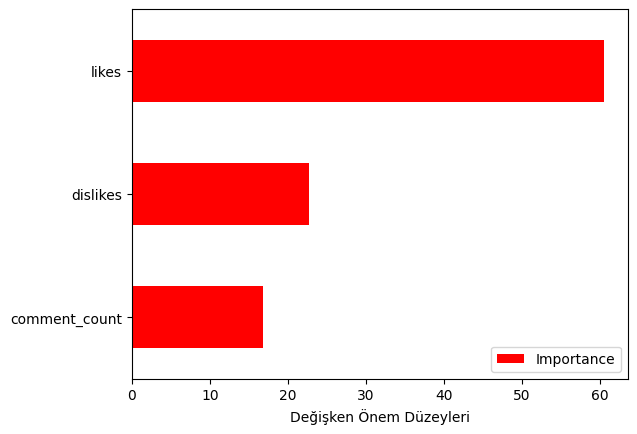

In [35]:
# Değişkenlerin önem düzeyine bakalım.
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## 2.7. XGBoost (Extreme Gradient Boosting)

###### XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
      - R, Python, Hadoop, Scala, Julia ile kullanılabilir.
      - Ölçeklenebilir.
      - Hızlı.
      - Tahmin başarısı yüksek.
      - Birçok kaggle yarışmasında başarısını kanıtlamış.

### 2.7.1. Model

In [36]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [37]:
# Pandas ya da NumPy yerine kendi dataframe'inizi kullanırsanız daha performanslı çalışacaktır.
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [38]:
# Pandas dataframe'i ile de kullanılabilir.
xgb_model = XGBRegressor().fit(X_train, y_train)# Model XGB yöntemiyle oluşturuldu ve fit edildi.

### 2.7.2. Tahmin

In [39]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5920889.327622586

### 2.7.3. Model Tuning

In [40]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [11]:
t1 =  datetime.now()

xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)
# Algoritmanın çalışma süresi;
t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
0:02:44.540577


In [12]:
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 100}

In [13]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, # En iyi parametreleri modelimize uygulayalım.
                         learning_rate = 0.5, 
                         max_depth = 5, 
                         n_estimators = 100) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4908721.488945145

### 2.8. Light GBM

##### Light GBM, XGBoost'un eğitim süresini azaltmaya yönelik geliştirilmiş bir diğer GBM türüdür.

##### 2017 yılında Microsoft tarafından geliştirilmiştir.
      - Daha performanslıdır.
      - Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi kullanır.
      - Breadth-first search (BSF) yerine depth-first search (DFS) arama algoritmasını kullanır.

### 2.8.1. Model

In [14]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [16]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train) # Model oluşturulduktan sonra fit ediliyor.

### 2.8.2. Tahmin

In [17]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

np.sqrt(mean_squared_error(y_test, y_pred))

13654891.61080595

### 2.8.3. Model Tuning

In [19]:
lgbm_model

LGBMRegressor()

In [20]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [21]:
# Algoritmanın çalışma süresini hesaplayarak gözlemleyelim.
t1 =  datetime.now()
lgbm_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
0:02:25.320427


In [22]:
# En iyi parametrelere bakalım.
lgbm_cv_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 40}

In [23]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 6, 
                           n_estimators = 40,
                          colsample_bytree = 0.9)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [24]:
y_pred = lgbm_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

9725556.519816948

## 2.9. CatBoost

##### Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevidir. 2017 yılında Yandex tarafından geliştirilmiştir.

    - Kategorik değişken desteği vardır.
    - Hızlı ve ölçeklenebilir GPU desteği vardır.
    - Hızlı train ve hızlı tahmin yapar.

### 2.9.1. Model

In [25]:
df=pd.read_csv("dataset/youtubeGB.csv")
youtube=df.copy()

youtube.index = youtube.iloc[:,0]
youtube=youtube.iloc[:,7:11]

youtube=youtube.sample(n=500) # Veri seti üzerindeki 500 kaydı veri seti üzerinde çalışma süresini azaltabilmek için 
                               # örneklem olarak alıyoruz.

youtube = youtube.dropna()
dms = pd.get_dummies(youtube[['likes', 'dislikes', 'comment_count']])
y = youtube["views"]
X_ = youtube.drop(['views', 'likes', 'dislikes', 'comment_count'], axis=1).astype('int64')
X = pd.concat([X_, dms[['likes', 'dislikes', 'comment_count']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [28]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.035065
0:	learn: 11603194.5811680	total: 182ms	remaining: 3m 2s
1:	learn: 11392241.0398419	total: 190ms	remaining: 1m 34s
2:	learn: 11183782.0079298	total: 196ms	remaining: 1m 5s
3:	learn: 10977078.0412333	total: 202ms	remaining: 50.2s
4:	learn: 10794507.6415420	total: 207ms	remaining: 41.3s
5:	learn: 10617304.7781672	total: 214ms	remaining: 35.4s
6:	learn: 10435629.0492499	total: 219ms	remaining: 31.1s
7:	learn: 10289364.9788916	total: 224ms	remaining: 27.8s
8:	learn: 10120330.7985215	total: 230ms	remaining: 25.3s
9:	learn: 9939841.7547553	total: 235ms	remaining: 23.3s
10:	learn: 9778292.7804099	total: 240ms	remaining: 21.6s
11:	learn: 9621479.3078205	total: 246ms	remaining: 20.3s
12:	learn: 9463609.1606711	total: 251ms	remaining: 19.1s
13:	learn: 9315380.7399808	total: 256ms	remaining: 18.1s
14:	learn: 9158370.8742154	total: 262ms	remaining: 17.2s
15:	learn: 9016613.6025934	total: 268ms	remaining: 16.5s
16:	learn: 8871242.3521467	total: 274ms	remaining: 15.9s
1

163:	learn: 3013582.2012864	total: 964ms	remaining: 4.91s
164:	learn: 3006714.3552205	total: 967ms	remaining: 4.89s
165:	learn: 3002717.2628468	total: 970ms	remaining: 4.87s
166:	learn: 2995794.7550012	total: 973ms	remaining: 4.85s
167:	learn: 2990214.5881568	total: 976ms	remaining: 4.83s
168:	learn: 2971894.4352102	total: 978ms	remaining: 4.81s
169:	learn: 2964579.1783036	total: 981ms	remaining: 4.79s
170:	learn: 2957883.8887105	total: 984ms	remaining: 4.77s
171:	learn: 2946771.8051383	total: 986ms	remaining: 4.75s
172:	learn: 2927287.8241646	total: 990ms	remaining: 4.73s
173:	learn: 2911311.4907964	total: 993ms	remaining: 4.71s
174:	learn: 2907969.4919405	total: 996ms	remaining: 4.69s
175:	learn: 2893525.5706347	total: 998ms	remaining: 4.67s
176:	learn: 2884080.4163832	total: 1s	remaining: 4.66s
177:	learn: 2869154.2116373	total: 1s	remaining: 4.64s
178:	learn: 2859730.0561535	total: 1.01s	remaining: 4.62s
179:	learn: 2838000.0624089	total: 1.01s	remaining: 4.6s
180:	learn: 2831815.8

354:	learn: 1824781.0736273	total: 1.54s	remaining: 2.79s
355:	learn: 1821776.2138653	total: 1.54s	remaining: 2.79s
356:	learn: 1819771.6061541	total: 1.54s	remaining: 2.78s
357:	learn: 1814431.7094866	total: 1.55s	remaining: 2.77s
358:	learn: 1809435.7492744	total: 1.55s	remaining: 2.77s
359:	learn: 1805308.4444280	total: 1.55s	remaining: 2.76s
360:	learn: 1803787.4269241	total: 1.56s	remaining: 2.75s
361:	learn: 1798853.5042967	total: 1.56s	remaining: 2.75s
362:	learn: 1796907.0582197	total: 1.56s	remaining: 2.74s
363:	learn: 1791787.1971986	total: 1.56s	remaining: 2.73s
364:	learn: 1788764.3754819	total: 1.57s	remaining: 2.73s
365:	learn: 1786854.7741871	total: 1.57s	remaining: 2.72s
366:	learn: 1781462.6887888	total: 1.57s	remaining: 2.72s
367:	learn: 1776164.3429292	total: 1.58s	remaining: 2.71s
368:	learn: 1774702.4711918	total: 1.58s	remaining: 2.7s
369:	learn: 1773265.8119993	total: 1.58s	remaining: 2.7s
370:	learn: 1768052.2068799	total: 1.59s	remaining: 2.69s
371:	learn: 1766

545:	learn: 1321785.3340344	total: 2.11s	remaining: 1.75s
546:	learn: 1319435.8822715	total: 2.11s	remaining: 1.75s
547:	learn: 1318115.3748302	total: 2.12s	remaining: 1.75s
548:	learn: 1316819.7215088	total: 2.12s	remaining: 1.74s
549:	learn: 1315664.2456210	total: 2.12s	remaining: 1.74s
550:	learn: 1314530.8002361	total: 2.12s	remaining: 1.73s
551:	learn: 1311092.9462038	total: 2.13s	remaining: 1.73s
552:	learn: 1308429.0346952	total: 2.13s	remaining: 1.72s
553:	learn: 1305583.8024441	total: 2.13s	remaining: 1.72s
554:	learn: 1302864.6043137	total: 2.14s	remaining: 1.71s
555:	learn: 1302367.4642045	total: 2.14s	remaining: 1.71s
556:	learn: 1301262.6132797	total: 2.14s	remaining: 1.7s
557:	learn: 1300178.8111709	total: 2.15s	remaining: 1.7s
558:	learn: 1297900.6142814	total: 2.15s	remaining: 1.7s
559:	learn: 1296834.9654982	total: 2.15s	remaining: 1.69s
560:	learn: 1293615.8365999	total: 2.15s	remaining: 1.69s
561:	learn: 1293191.1494534	total: 2.16s	remaining: 1.68s
562:	learn: 12904

730:	learn: 982802.6466794	total: 2.67s	remaining: 984ms
731:	learn: 981241.2149169	total: 2.68s	remaining: 981ms
732:	learn: 978912.6200566	total: 2.68s	remaining: 978ms
733:	learn: 978348.7816845	total: 2.69s	remaining: 974ms
734:	learn: 977590.7888619	total: 2.69s	remaining: 971ms
735:	learn: 975731.7827596	total: 2.7s	remaining: 968ms
736:	learn: 973555.3478755	total: 2.7s	remaining: 964ms
737:	learn: 972025.2326583	total: 2.71s	remaining: 961ms
738:	learn: 970513.2957445	total: 2.71s	remaining: 958ms
739:	learn: 969970.0068981	total: 2.72s	remaining: 955ms
740:	learn: 969235.3482358	total: 2.72s	remaining: 951ms
741:	learn: 967711.1794739	total: 2.73s	remaining: 948ms
742:	learn: 966214.5376125	total: 2.73s	remaining: 945ms
743:	learn: 964744.1402705	total: 2.74s	remaining: 942ms
744:	learn: 963327.3419143	total: 2.74s	remaining: 939ms
745:	learn: 961203.0375612	total: 2.75s	remaining: 936ms
746:	learn: 959777.4443389	total: 2.75s	remaining: 933ms
747:	learn: 958387.3105192	total:

888:	learn: 781908.1308910	total: 3.26s	remaining: 407ms
889:	learn: 781155.3667755	total: 3.26s	remaining: 403ms
890:	learn: 780405.2655748	total: 3.26s	remaining: 399ms
891:	learn: 779838.7339511	total: 3.27s	remaining: 396ms
892:	learn: 778512.1946076	total: 3.27s	remaining: 392ms
893:	learn: 777821.5530731	total: 3.27s	remaining: 388ms
894:	learn: 777115.5354792	total: 3.28s	remaining: 385ms
895:	learn: 776426.3121110	total: 3.28s	remaining: 381ms
896:	learn: 775660.8894453	total: 3.29s	remaining: 377ms
897:	learn: 775150.7372781	total: 3.29s	remaining: 374ms
898:	learn: 774611.6708975	total: 3.29s	remaining: 370ms
899:	learn: 773124.0017950	total: 3.29s	remaining: 366ms
900:	learn: 772433.2996680	total: 3.3s	remaining: 362ms
901:	learn: 770708.4121804	total: 3.3s	remaining: 359ms
902:	learn: 770067.5979069	total: 3.3s	remaining: 355ms
903:	learn: 769435.2666915	total: 3.31s	remaining: 351ms
904:	learn: 768215.6545465	total: 3.31s	remaining: 347ms
905:	learn: 767584.6128165	total: 

### 2.9.2. Tahmin

In [29]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

20245396.38465905

### 2.9.3. Model Tuning

In [32]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [33]:
# Modellerin her birini ne kadar sürede fit ettiğine bakalım.
t1 =  datetime.now()
catb_cv_model.fit(X_train, y_train)
t2 =  datetime.now()
print(t2-t1)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 11755073.3777926	total: 6.02ms	remaining: 6.02s
1:	learn: 11695938.9759451	total: 12.2ms	remaining: 6.09s
2:	learn: 11634115.8726865	total: 17ms	remaining: 5.66s
3:	learn: 11575888.4561498	total: 22.4ms	remaining: 5.57s
4:	learn: 11517251.2013188	total: 27.8ms	remaining: 5.53s
5:	learn: 11462589.6549271	total: 32.8ms	remaining: 5.43s
6:	learn: 11402998.8316421	total: 37.9ms	remaining: 5.38s
7:	learn: 11344575.0646080	total: 44.2ms	remaining: 5.48s
8:	learn: 11284694.0450410	total: 50.1ms	remaining: 5.52s
9:	learn: 11226007.6371186	total: 56ms	remaining: 5.55s
10:	learn: 11175955.7219027	total: 61.9ms	remaining: 5.56s
11:	learn: 11124030.1147350	total: 67.6ms	remaining: 5.56s
12:	learn: 11069456.6052224	total: 73.5ms	remaining: 5.58s
13:	learn: 11018141.6310824	total: 78.6ms	remaining: 5.54s
14:	learn: 10960715.0613742	total: 84.9ms	remaining: 5.57s
15:	learn: 10904864.6510833	total: 90.2ms	remaining: 5.54s
16:	lear

167:	learn: 5990553.1512089	total: 1.01s	remaining: 5.01s
168:	learn: 5970377.8379178	total: 1.02s	remaining: 5.01s
169:	learn: 5947931.9021509	total: 1.03s	remaining: 5.02s
170:	learn: 5935653.8696149	total: 1.04s	remaining: 5.03s
171:	learn: 5914648.3406435	total: 1.04s	remaining: 5.03s
172:	learn: 5895720.6653860	total: 1.05s	remaining: 5.02s
173:	learn: 5877764.5923897	total: 1.05s	remaining: 5.01s
174:	learn: 5859869.9265618	total: 1.06s	remaining: 5.01s
175:	learn: 5841858.4231342	total: 1.07s	remaining: 5s
176:	learn: 5824397.2599782	total: 1.07s	remaining: 4.99s
177:	learn: 5806002.0684841	total: 1.08s	remaining: 4.98s
178:	learn: 5788898.9389600	total: 1.08s	remaining: 4.97s
179:	learn: 5769122.6752171	total: 1.09s	remaining: 4.96s
180:	learn: 5752048.0765789	total: 1.09s	remaining: 4.95s
181:	learn: 5738332.9862077	total: 1.1s	remaining: 4.94s
182:	learn: 5722686.3417393	total: 1.1s	remaining: 4.93s
183:	learn: 5706511.7390910	total: 1.11s	remaining: 4.92s
184:	learn: 5689776

322:	learn: 4072146.7839751	total: 1.99s	remaining: 4.16s
323:	learn: 4060598.4866397	total: 1.99s	remaining: 4.16s
324:	learn: 4051317.9251518	total: 2s	remaining: 4.16s
325:	learn: 4041202.7120992	total: 2.01s	remaining: 4.15s
326:	learn: 4032777.4978508	total: 2.02s	remaining: 4.15s
327:	learn: 4025541.8913993	total: 2.02s	remaining: 4.14s
328:	learn: 4014328.9036386	total: 2.03s	remaining: 4.14s
329:	learn: 4006685.9456146	total: 2.04s	remaining: 4.13s
330:	learn: 3996369.8867481	total: 2.04s	remaining: 4.13s
331:	learn: 3988872.2628046	total: 2.05s	remaining: 4.13s
332:	learn: 3982089.1750862	total: 2.06s	remaining: 4.12s
333:	learn: 3975149.6243493	total: 2.06s	remaining: 4.12s
334:	learn: 3963494.1232527	total: 2.07s	remaining: 4.11s
335:	learn: 3959166.7914301	total: 2.08s	remaining: 4.11s
336:	learn: 3948892.9757225	total: 2.09s	remaining: 4.1s
337:	learn: 3941128.0528661	total: 2.09s	remaining: 4.1s
338:	learn: 3936479.6260022	total: 2.1s	remaining: 4.09s
339:	learn: 3926737.

468:	learn: 3146425.6516248	total: 3.01s	remaining: 3.41s
469:	learn: 3141531.8559368	total: 3.02s	remaining: 3.4s
470:	learn: 3136597.0327093	total: 3.03s	remaining: 3.4s
471:	learn: 3129931.7498640	total: 3.03s	remaining: 3.39s
472:	learn: 3124871.4424070	total: 3.04s	remaining: 3.39s
473:	learn: 3117363.6097449	total: 3.05s	remaining: 3.38s
474:	learn: 3114915.1236639	total: 3.06s	remaining: 3.38s
475:	learn: 3112277.2560016	total: 3.06s	remaining: 3.37s
476:	learn: 3106396.8881839	total: 3.07s	remaining: 3.37s
477:	learn: 3101947.1420410	total: 3.08s	remaining: 3.36s
478:	learn: 3098219.8294067	total: 3.08s	remaining: 3.36s
479:	learn: 3092967.3766701	total: 3.09s	remaining: 3.35s
480:	learn: 3089541.4932173	total: 3.1s	remaining: 3.35s
481:	learn: 3086727.4077035	total: 3.1s	remaining: 3.33s
482:	learn: 3081871.6783300	total: 3.11s	remaining: 3.33s
483:	learn: 3079446.4529941	total: 3.12s	remaining: 3.32s
484:	learn: 3075678.7396025	total: 3.12s	remaining: 3.32s
485:	learn: 306954

615:	learn: 2580333.1284531	total: 4.03s	remaining: 2.51s
616:	learn: 2578800.9125228	total: 4.03s	remaining: 2.5s
617:	learn: 2577348.1086546	total: 4.04s	remaining: 2.5s
618:	learn: 2572944.0846212	total: 4.05s	remaining: 2.49s
619:	learn: 2569504.0687969	total: 4.05s	remaining: 2.48s
620:	learn: 2566397.2886118	total: 4.06s	remaining: 2.48s
621:	learn: 2560478.9693868	total: 4.07s	remaining: 2.47s
622:	learn: 2558065.8898110	total: 4.08s	remaining: 2.47s
623:	learn: 2556481.9478945	total: 4.08s	remaining: 2.46s
624:	learn: 2552617.5555754	total: 4.09s	remaining: 2.46s
625:	learn: 2549769.5857211	total: 4.1s	remaining: 2.45s
626:	learn: 2548238.2774557	total: 4.11s	remaining: 2.44s
627:	learn: 2544627.7228548	total: 4.12s	remaining: 2.44s
628:	learn: 2542325.7490018	total: 4.12s	remaining: 2.43s
629:	learn: 2539696.2647108	total: 4.13s	remaining: 2.43s
630:	learn: 2536052.7856610	total: 4.14s	remaining: 2.42s
631:	learn: 2532905.7939181	total: 4.14s	remaining: 2.41s
632:	learn: 25311

763:	learn: 2222268.4367211	total: 5.05s	remaining: 1.56s
764:	learn: 2221229.0691008	total: 5.06s	remaining: 1.55s
765:	learn: 2218118.4579447	total: 5.06s	remaining: 1.55s
766:	learn: 2215634.3695592	total: 5.07s	remaining: 1.54s
767:	learn: 2214619.4185345	total: 5.07s	remaining: 1.53s
768:	learn: 2213606.2003738	total: 5.07s	remaining: 1.52s
769:	learn: 2211651.1281316	total: 5.08s	remaining: 1.52s
770:	learn: 2210561.5078210	total: 5.08s	remaining: 1.51s
771:	learn: 2209564.2500409	total: 5.09s	remaining: 1.5s
772:	learn: 2208578.5561205	total: 5.09s	remaining: 1.49s
773:	learn: 2205725.8790097	total: 5.09s	remaining: 1.49s
774:	learn: 2202653.2905872	total: 5.1s	remaining: 1.48s
775:	learn: 2200192.0519091	total: 5.1s	remaining: 1.47s
776:	learn: 2197207.1380860	total: 5.11s	remaining: 1.47s
777:	learn: 2194630.8257772	total: 5.11s	remaining: 1.46s
778:	learn: 2191499.8265215	total: 5.12s	remaining: 1.45s
779:	learn: 2188989.0552388	total: 5.12s	remaining: 1.44s
780:	learn: 21880

925:	learn: 1947064.1167085	total: 5.85s	remaining: 468ms
926:	learn: 1944735.6281667	total: 5.85s	remaining: 461ms
927:	learn: 1942240.6023902	total: 5.86s	remaining: 455ms
928:	learn: 1941512.6844595	total: 5.86s	remaining: 448ms
929:	learn: 1939115.8611360	total: 5.87s	remaining: 442ms
930:	learn: 1938109.4988648	total: 5.87s	remaining: 435ms
931:	learn: 1937334.3969550	total: 5.88s	remaining: 429ms
932:	learn: 1934985.0769464	total: 5.88s	remaining: 422ms
933:	learn: 1933017.2420612	total: 5.88s	remaining: 416ms
934:	learn: 1930688.6890175	total: 5.89s	remaining: 409ms
935:	learn: 1928311.2257758	total: 5.89s	remaining: 403ms
936:	learn: 1926019.9502977	total: 5.9s	remaining: 397ms
937:	learn: 1923750.2861284	total: 5.9s	remaining: 390ms
938:	learn: 1923045.8647812	total: 5.91s	remaining: 384ms
939:	learn: 1922298.0042922	total: 5.91s	remaining: 377ms
940:	learn: 1921600.3260077	total: 5.92s	remaining: 371ms
941:	learn: 1920854.1653543	total: 5.92s	remaining: 364ms
942:	learn: 1918

In [34]:
# En iyi parametreler
catb_cv_model.best_params_

{'depth': 8, 'iterations': 1000, 'learning_rate': 0.01}

In [35]:
# En iyi parametrelerin uygulanması ve fit edilmesi
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 11755073.3777926	total: 6.9ms	remaining: 6.9s
1:	learn: 11695938.9759451	total: 13.3ms	remaining: 6.66s
2:	learn: 11634115.8726865	total: 20ms	remaining: 6.64s
3:	learn: 11575888.4561498	total: 26.4ms	remaining: 6.56s
4:	learn: 11517251.2013188	total: 32.7ms	remaining: 6.51s
5:	learn: 11462589.6549271	total: 38.9ms	remaining: 6.45s
6:	learn: 11402998.8316421	total: 45.1ms	remaining: 6.4s
7:	learn: 11344575.0646080	total: 52ms	remaining: 6.44s
8:	learn: 11284694.0450410	total: 58.8ms	remaining: 6.48s
9:	learn: 11226007.6371186	total: 65.9ms	remaining: 6.53s
10:	learn: 11175955.7219027	total: 72.7ms	remaining: 6.53s
11:	learn: 11124030.1147350	total: 79.8ms	remaining: 6.57s
12:	learn: 11069456.6052224	total: 86.9ms	remaining: 6.6s
13:	learn: 11018141.6310824	total: 94.4ms	remaining: 6.65s
14:	learn: 10960715.0613742	total: 102ms	remaining: 6.71s
15:	learn: 10904864.6510833	total: 109ms	remaining: 6.72s
16:	learn: 10852062.5747336	total: 117ms	remaining: 6.76s
17:	learn: 1080005

147:	learn: 6370912.2589399	total: 1.02s	remaining: 5.85s
148:	learn: 6347466.6087323	total: 1.02s	remaining: 5.84s
149:	learn: 6326905.2349621	total: 1.03s	remaining: 5.84s
150:	learn: 6307060.4324958	total: 1.04s	remaining: 5.83s
151:	learn: 6290444.9011379	total: 1.04s	remaining: 5.83s
152:	learn: 6270757.4155357	total: 1.05s	remaining: 5.83s
153:	learn: 6253133.5425219	total: 1.06s	remaining: 5.83s
154:	learn: 6235917.5575852	total: 1.07s	remaining: 5.82s
155:	learn: 6216154.6763454	total: 1.07s	remaining: 5.81s
156:	learn: 6198698.1228052	total: 1.08s	remaining: 5.81s
157:	learn: 6182833.8552077	total: 1.09s	remaining: 5.8s
158:	learn: 6166177.7441052	total: 1.1s	remaining: 5.8s
159:	learn: 6146749.5001191	total: 1.1s	remaining: 5.79s
160:	learn: 6123634.8289966	total: 1.11s	remaining: 5.79s
161:	learn: 6109695.9756385	total: 1.12s	remaining: 5.78s
162:	learn: 6088816.8126722	total: 1.12s	remaining: 5.78s
163:	learn: 6070703.9594534	total: 1.13s	remaining: 5.77s
164:	learn: 605077

317:	learn: 4116539.0026709	total: 2.22s	remaining: 4.76s
318:	learn: 4109344.2630413	total: 2.23s	remaining: 4.75s
319:	learn: 4098585.2926713	total: 2.23s	remaining: 4.75s
320:	learn: 4089067.1908018	total: 2.24s	remaining: 4.74s
321:	learn: 4079447.3157556	total: 2.25s	remaining: 4.73s
322:	learn: 4072146.7839751	total: 2.25s	remaining: 4.73s
323:	learn: 4060598.4866397	total: 2.26s	remaining: 4.72s
324:	learn: 4051317.9251518	total: 2.27s	remaining: 4.71s
325:	learn: 4041202.7120992	total: 2.28s	remaining: 4.71s
326:	learn: 4032777.4978508	total: 2.28s	remaining: 4.7s
327:	learn: 4025541.8913993	total: 2.29s	remaining: 4.69s
328:	learn: 4014328.9036386	total: 2.3s	remaining: 4.68s
329:	learn: 4006685.9456146	total: 2.3s	remaining: 4.68s
330:	learn: 3996369.8867481	total: 2.31s	remaining: 4.67s
331:	learn: 3988872.2628046	total: 2.32s	remaining: 4.66s
332:	learn: 3982089.1750862	total: 2.32s	remaining: 4.66s
333:	learn: 3975149.6243493	total: 2.33s	remaining: 4.65s
334:	learn: 39634

464:	learn: 3167580.8778533	total: 3.24s	remaining: 3.73s
465:	learn: 3162283.5964116	total: 3.24s	remaining: 3.72s
466:	learn: 3158282.5032742	total: 3.25s	remaining: 3.71s
467:	learn: 3153731.2114647	total: 3.26s	remaining: 3.7s
468:	learn: 3146425.6516248	total: 3.27s	remaining: 3.7s
469:	learn: 3141531.8559368	total: 3.27s	remaining: 3.69s
470:	learn: 3136597.0327093	total: 3.28s	remaining: 3.68s
471:	learn: 3129931.7498640	total: 3.29s	remaining: 3.68s
472:	learn: 3124871.4424070	total: 3.29s	remaining: 3.67s
473:	learn: 3117363.6097449	total: 3.3s	remaining: 3.66s
474:	learn: 3114915.1236639	total: 3.31s	remaining: 3.65s
475:	learn: 3112277.2560016	total: 3.31s	remaining: 3.65s
476:	learn: 3106396.8881839	total: 3.32s	remaining: 3.64s
477:	learn: 3101947.1420410	total: 3.33s	remaining: 3.63s
478:	learn: 3098219.8294067	total: 3.33s	remaining: 3.63s
479:	learn: 3092967.3766701	total: 3.34s	remaining: 3.62s
480:	learn: 3089541.4932173	total: 3.35s	remaining: 3.61s
481:	learn: 30867

612:	learn: 2590557.1454953	total: 4.27s	remaining: 2.69s
613:	learn: 2584701.1687457	total: 4.27s	remaining: 2.69s
614:	learn: 2581861.0311435	total: 4.28s	remaining: 2.68s
615:	learn: 2580333.1284531	total: 4.29s	remaining: 2.67s
616:	learn: 2578800.9125228	total: 4.3s	remaining: 2.67s
617:	learn: 2577348.1086546	total: 4.3s	remaining: 2.66s
618:	learn: 2572944.0846212	total: 4.31s	remaining: 2.65s
619:	learn: 2569504.0687969	total: 4.32s	remaining: 2.65s
620:	learn: 2566397.2886118	total: 4.32s	remaining: 2.64s
621:	learn: 2560478.9693868	total: 4.33s	remaining: 2.63s
622:	learn: 2558065.8898110	total: 4.34s	remaining: 2.63s
623:	learn: 2556481.9478945	total: 4.35s	remaining: 2.62s
624:	learn: 2552617.5555754	total: 4.35s	remaining: 2.61s
625:	learn: 2549769.5857211	total: 4.36s	remaining: 2.6s
626:	learn: 2548238.2774557	total: 4.37s	remaining: 2.6s
627:	learn: 2544627.7228548	total: 4.37s	remaining: 2.59s
628:	learn: 2542325.7490018	total: 4.38s	remaining: 2.58s
629:	learn: 253969

761:	learn: 2226428.7808633	total: 5.28s	remaining: 1.65s
762:	learn: 2225340.9824550	total: 5.29s	remaining: 1.64s
763:	learn: 2222268.4367211	total: 5.3s	remaining: 1.64s
764:	learn: 2221229.0691008	total: 5.3s	remaining: 1.63s
765:	learn: 2218118.4579447	total: 5.31s	remaining: 1.62s
766:	learn: 2215634.3695592	total: 5.32s	remaining: 1.61s
767:	learn: 2214619.4185345	total: 5.33s	remaining: 1.61s
768:	learn: 2213606.2003738	total: 5.33s	remaining: 1.6s
769:	learn: 2211651.1281316	total: 5.33s	remaining: 1.59s
770:	learn: 2210561.5078210	total: 5.34s	remaining: 1.59s
771:	learn: 2209564.2500409	total: 5.35s	remaining: 1.58s
772:	learn: 2208578.5561205	total: 5.35s	remaining: 1.57s
773:	learn: 2205725.8790097	total: 5.36s	remaining: 1.56s
774:	learn: 2202653.2905872	total: 5.37s	remaining: 1.56s
775:	learn: 2200192.0519091	total: 5.37s	remaining: 1.55s
776:	learn: 2197207.1380860	total: 5.38s	remaining: 1.54s
777:	learn: 2194630.8257772	total: 5.39s	remaining: 1.54s
778:	learn: 21914

910:	learn: 1972611.9343896	total: 6.31s	remaining: 617ms
911:	learn: 1970163.9157366	total: 6.32s	remaining: 610ms
912:	learn: 1967729.2629300	total: 6.32s	remaining: 603ms
913:	learn: 1965356.5188672	total: 6.33s	remaining: 596ms
914:	learn: 1964565.6876350	total: 6.34s	remaining: 589ms
915:	learn: 1962526.7268812	total: 6.34s	remaining: 582ms
916:	learn: 1961068.7816963	total: 6.35s	remaining: 575ms
917:	learn: 1960033.9201676	total: 6.36s	remaining: 568ms
918:	learn: 1957609.7721246	total: 6.37s	remaining: 561ms
919:	learn: 1956587.1484666	total: 6.38s	remaining: 554ms
920:	learn: 1955863.2769013	total: 6.38s	remaining: 548ms
921:	learn: 1953497.9806397	total: 6.39s	remaining: 541ms
922:	learn: 1950952.1735697	total: 6.4s	remaining: 534ms
923:	learn: 1950236.6638192	total: 6.4s	remaining: 527ms
924:	learn: 1947830.6858249	total: 6.41s	remaining: 520ms
925:	learn: 1947064.1167085	total: 6.42s	remaining: 513ms
926:	learn: 1944735.6281667	total: 6.42s	remaining: 506ms
927:	learn: 1942

In [36]:
y_pred = catb_tuned.predict(X_test) # Model üzerinde tuning işlemi yapıldıktan sonraki tahminsel değer
np.sqrt(mean_squared_error(y_test, y_pred)) # y_test'in ve y_pred'in ortalama karesel hatası

20711440.960997775